##**1. ANN (Artificial Neural Network)**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

###(1) NAND 데이터 구현

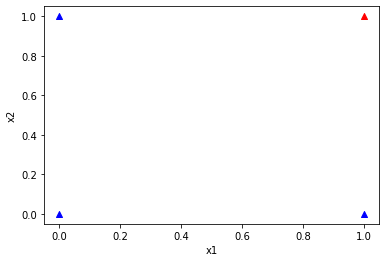

In [ ]:
T = 1.0
F = 0.0
bias = 1.0

In [ ]:
def get_NAND_data():
    X = [
     [F, F, bias],
     [F, T, bias],
     [T, F, bias],
     [T, T, bias]
    ]

    Y = [
        ['''1'''],
        ['''2'''],
        ['''3'''],
        ['''4''']
    ]

    return X, Y

In [ ]:
X, Y = '''5'''()

In [ ]:
##해당 코드는 실행하지 않아도 됩니다 (시간이 오래 걸려서 결과만 확인해주세요!)
tf.model = tf.keras.Sequential()
tf.model.add(tf.keras.layers.Dense(units=1, input_dim=3, activation='sigmoid'))
tf.model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.SGD(lr=0.01), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(X, Y, epochs=5000)

predictions = tf.model.predict(X)
print('Prediction: \n', predictions)

score = tf.model.evaluate(X, Y)
print('Accuracy: ', score[1])

Streaming output truncated to the last 5000 lines.
Epoch 2505/5000
1/1 [==============================] - 0s 14ms/step - loss: 0.2627 - accuracy: 1.0000
Epoch 2506/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.2626 - accuracy: 1.0000
Epoch 2507/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.2626 - accuracy: 1.0000
Epoch 2508/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.2625 - accuracy: 1.0000
Epoch 2509/5000
1/1 [==============================] - 0s 18ms/step - loss: 0.2625 - accuracy: 1.0000
Epoch 2510/5000
1/1 [==============================] - 0s 17ms/step - loss: 0.2624 - accuracy: 1.0000
Epoch 2511/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.2624 - accuracy: 1.0000
Epoch 2512/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.2623 - accuracy: 1.0000
Epoch 2513/5000
1/1 [==============================] - 0s 16ms/step - loss: 0.2623 - accuracy: 1.0000
Epoch 2514/5000
1/1 [==========

###(2) 시각화

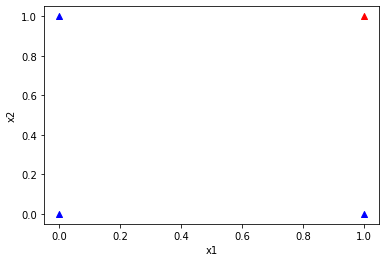

In [ ]:
plt.scatter(X[0][0],X[0][1], c='blue' , marker='^')
plt.scatter(X[3][0],X[3][1], c='red' , marker='^')
plt.scatter(X[1][0],X[1][1], c='blue' , marker='^')
plt.scatter(X[2][0],X[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

###(3) 서술형 문제

**1. Activation function이 linear할때의 문제점에 대해 서술하세요.**

정답)  

1)  
2) 

**2. 인공신경망의 성능을 나타내는 지표로 정확도가 아닌 손실함수를 지표로 사용하는지?**

정답)

1) 

##**2. MLP (Multi-Layer Perceptron)**

###(1) 데이터 설명

**MNIST data**  

손으로 쓴 숫자들을 포함하는 이미지 데이터셋.
0 ~ 9까지의 숫자 이미지 70,000개

X: 이미지 (밝기에 따라 0~255 사이의 값을 가지는 28(가로) × 28(세로)로 구성되어 총 784개의 픽셀로 구성)

Y: 레이블 (클래스는 0부터 9까지의 숫자를 의미)


###(2) 데이터 불러오기

In [ ]:
# MNIST 데이터셋을 로드한다. (keras에서 제공하는 손글씨 숫자 이미지 데이터셋)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


###(3) 데이터 전처리

In [ ]:
# 입력 이미지 데이터를 [0, 1] 범위로 정규화
x_train = '''1''' / 255    #x_train을 float32로 바꾸기
x_test = '''2''' / 255     #x_test를 float32로 바꾸기

In [ ]:
# 2차원 이미지를 1차원 벡터로 변환
x_train = x_train.reshape('''3''')   #hint: X는 총 784개의 픽셀로 구성되어 있다
x_test = x_test.reshape('''3''')

In [ ]:
# 레이블 전처리 : 출력 레이블을 one-hot encoding으로 변환해준다.
# MNIST은 10개의 클래스로 이루어진 데이터셋이기 때문에, 각 클래스를 나타내는 one-hot 벡터의 길이는 10이 되어야 함. 
y_train = keras.utils.to_categorical(y_train, '''4''')
y_test = keras.utils.to_categorical(y_test, '''4''')

###(4) 모델 학습 및 성능 평가

In [ ]:
# 모델 구성 : 입력층과 출력층 사이에 2개의 은닉층을 추가
model = keras.Sequential([
    keras.layers.Dense('''5''', activation=" '''6''' ", input_shape=(784,)),   #은닉층1: neuron layer 128개, activation 함수는 relu 
    keras.layers.Dropout(0.2),
    keras.layers.Dense('''7''', activation=" '''8''' "),  #은닉층2: neuron layer 64개, activation 함수는 relu
    keras.layers.Dropout(0.2),
    keras.layers.Dense('''9''', activation=" '''10''' ")  #출력층: 출력값 class는 10개, activation 함수는 softmax
])

In [ ]:
# 모델 컴파일 : 최적화 알고리즘으로 Adam, 다중분류 문제이므로 손실 함수로 categorical_crossentropy를 사용
model.compile(optimizer=" '''11''' ", loss=" '''12''' ", metrics=["accuracy"])

In [ ]:
# 모델 학습 : 애포크 수와 배치크기 설정
history = model.fit(x_train, y_train, epochs='''13''', batch_size='''14''', validation_split='''15''')   #epochs는 10, batch_size는 32, validation_split=0.2

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {'''16'''}")

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3697 - accuracy: 0.8886 - val_loss: 0.1593 - val_accuracy: 0.9528
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1789 - accuracy: 0.9471 - val_loss: 0.1132 - val_accuracy: 0.9650
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1386 - accuracy: 0.9577 - val_loss: 0.1046 - val_accuracy: 0.9698
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1137 - accuracy: 0.9647 - val_loss: 0.0955 - val_accuracy: 0.9716
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1021 - accuracy: 0.9680 - val_loss: 0.0901 - val_accuracy: 0.9729
Epoch 6/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0885 - accuracy: 0.9723 - val_loss: 0.0875 - val_accuracy: 0.9759
Epoch 7/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.0789 - accuracy: 0.9746 - val_loss: 0.0979 - val_acc

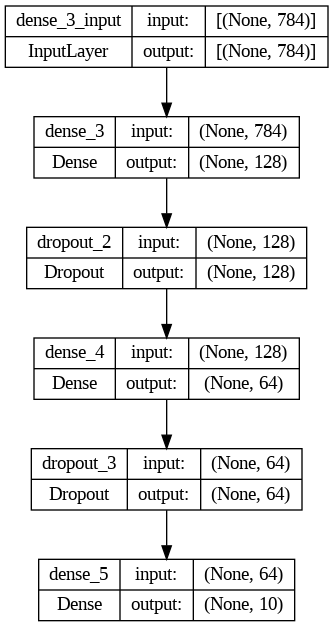

In [ ]:
# 모델 시각화 : 입력층부터 출력층까지의 연결구조를 그래프 형태로 시각화한 이미지를 출력
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file="mnist_model.png")

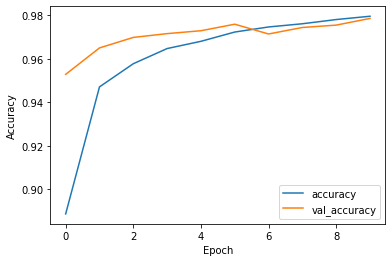

In [ ]:
# 학습 과정 시각화
plt.plot(history.history[" '''1''' "], label=" '''1''' ")
plt.plot(history.history[" '''2''' "], label=" '''2''' ")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

313/313 [==============================] - 1s 3ms/step


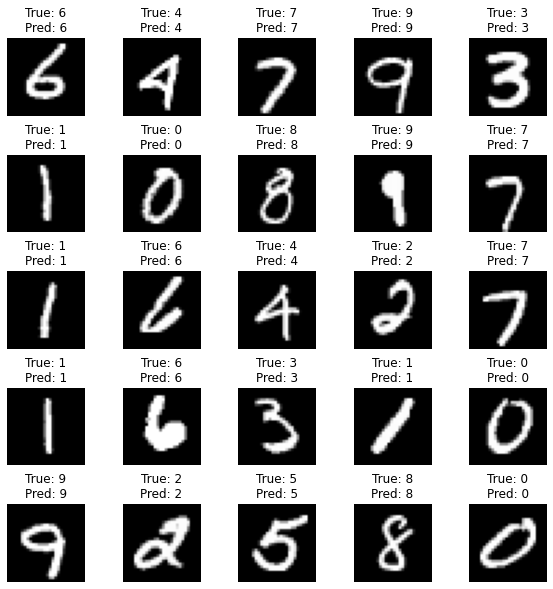

In [ ]:
# 모델 예측 및 시각화
y_pred = '''3'''(x_test)

fig, axs = plt.subplots(5, 5, figsize=(10, 10))
axs = axs.'''4'''()                                 # ravel 함수를 사용하여 2차원 배열을 1차원 배열로 만들어 출력의 편의성을 높임.
for i in np.arange(0, 25):
    idx = np.random.randint(0, len(x_test))
    axs[i].imshow(x_test[idx].reshape(28, 28), cmap="gray")
    axs[i].set_title(f"True: {np.argmax(y_test[idx])}\nPred: {np.argmax(y_pred[idx])}")
    axs[i].axis("off")
plt.subplots_adjust(hspace=0.5)
plt.show()

##**3. MLP - Fashion_MNIST data**

**Fashion_MNIST data**  

70,000 grayscale images in 10 categories  
clothing

X: 이미지 (밝기에 따라 0~255 사이의 값을 가지는 28(가로) × 28(세로)로 구성되어 총 784개의 픽셀로 구성)

Y: 레이블 (0~9까지의 정수 값은 이미지(옷)의 클래스를 나타냄)
* 0 : T-shirt/top  
* 1 : Trouser  
* 2 : Pullover  
* 3 : Dress  
* 4 : Coat  
* 5 : Sandal  
* 6 : Shirt  
* 7 : Sneaker  
* 8 : Bag  
* 9 : Ankel boot

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Fashion-MNIST 데이터셋을 로드한다.
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [ ]:
# Q1. 입력 이미지 데이터를 [0, 1] 범위로 정규화하세요.
x_train = ''' 1 '''
x_test = ''' 1 '''

In [ ]:
# Q2. 2차원 이미지를 1차원 벡터로 변환하세요.
x_train = ''' 2 '''
x_test = ''' 2 '''

In [ ]:
# Q3. 레이블 전처리 : 출력 레이블을 one-hot encoding으로 변환해주세요.
# Fashoin-MNIST은 10개의 클래스로 이루어진 데이터셋이기 때문에, 각 클래스를 나타내는 one-hot 벡터의 길이는 10이 되어야 함.
y_train = ''' 3 '''
y_test = ''' 3 '''

In [ ]:
# Q4. 모델 구성 : 2개의 은닉층엔 각각 128개, 64개의 뉴런으로 이루어져있고 마지막 출력층은 10개의 뉴런으로 이루어져 있습니다.
#                 은닉층에는 relu 함수를 사용하여 비선형성을 추가하고, 출력층에서는 softmax 함수를 사용하여 다중분류 문제를 해결해주세요.
# Dropout을 이용해 모델이 학습 데이터에 과도하게 적합되는 것을 방지하여 일반화 성능을 개선하여주세요.
model = keras.Sequential([
    keras.layers.Dense(''' 4 '''),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(''' 4 '''),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(''' 4 ''')
])

In [ ]:
# Q5. 모델 컴파일 : 최적화 알고리즘으로 Adam, 다중분류 문제이므로 손실 함수로 categorical_crossentropy를 사용하여 코드를 완성해주세요.
model.compile(''' 5 ''', metrics=["accuracy"])

In [ ]:
# Q6. 모델 학습 : 애포크 = 10, 배치 크기 = 32, validation_split = 0.2로 하여 코드를 완성하세요.
history = model.fit(''' 6 ''')

Epoch 1/10
1500/1500 [==============================] - 11s 6ms/step - loss: 0.6117 - accuracy: 0.7824 - val_loss: 0.4312 - val_accuracy: 0.8458
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4415 - accuracy: 0.8409 - val_loss: 0.3850 - val_accuracy: 0.8632
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4026 - accuracy: 0.8532 - val_loss: 0.3875 - val_accuracy: 0.8565
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3788 - accuracy: 0.8640 - val_loss: 0.3508 - val_accuracy: 0.8738
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3605 - accuracy: 0.8662 - val_loss: 0.3531 - val_accuracy: 0.8710
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3495 - accuracy: 0.8711 - val_loss: 0.3359 - val_accuracy: 0.8802
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3392 - accuracy: 0.8740 - val_loss: 0.3305 - val_accuracy

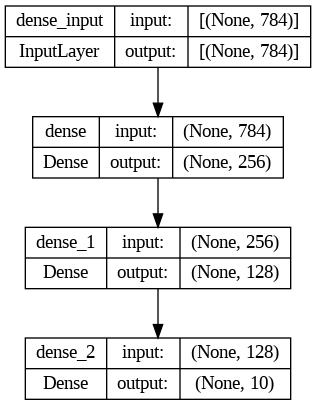

In [ ]:
# 모델 시각화 : 입력층부터 출력층까지의 연결구조를 그래프 형태로 시각화한 이미지를 출력
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True, to_file="fashion_mnist_model.png")

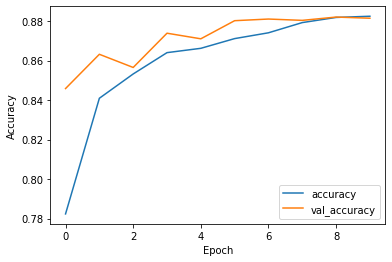

In [ ]:
# 학습 과정 시각화
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Q7. 학습된 모델의 성능을 측정하는 함수를 넣어 코드를 완성하세요.
test_loss, test_acc = model.''' 7 '''(x_test, y_test, verbose=0)
print("Test accuracy:", test_acc)

Test accuracy: 0.8702999949455261


313/313 [==============================] - 1s 2ms/step


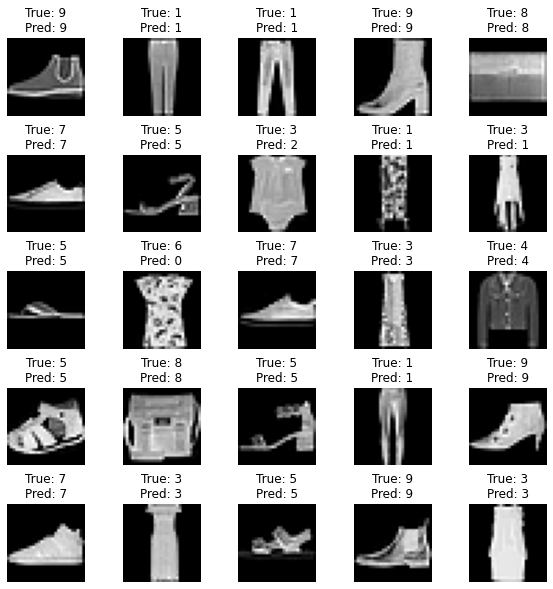

In [ ]:
# 모델 예측 및 시각화
y_pred = model.predict(x_test)

fig, axs = plt.subplots(5, 5, figsize=(10, 10))
axs = axs.ravel()
for i in np.arange(0, 25):
    idx = np.random.randint(0, len(x_test))
    axs[i].imshow(x_test[idx].reshape(28, 28), cmap="gray")
    axs[i].set_title(f"True: {np.argmax(y_test[idx])}\nPred: {np.argmax(y_pred[idx])}")
    axs[i].axis("off")
plt.subplots_adjust(hspace=0.5)
plt.show()

##**4. MLP - CIFAR-10 data**

###(1) 데이터 설명

**CIFAR-10 data**  

60,000개의 이미지와 10개의 클래스로 구성된 데이터 셋

X: 이미지 (밝기에 따라 0~255 사이의 값을 가지는 32(가로) × 32(세로)로 구성되어 총 1024개의 픽셀로 구성)

Y: 레이블 (0~9까지의 정수 값은 서로 다른 객체의 클래스를 나타냄)
* 0 : Airplane
* 1 : Automobile 
* 2 : Bird
* 3 : Cat  
* 4 : Deer  
* 5 : Dog  
* 6 : Frog  
* 7 : Horse  
* 8 : Shipe
* 9 : Truck

###(2) 데이터 불러오기

In [ ]:
# CIFAR-10 데이터셋 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

###(3) 데이터 전처리

In [ ]:
# 입력 이미지 데이터를 [0, 1] 범위로 정규화
x_train = '''1''' / 255    #x_train을 float32로 바꾸기
x_test = '''2''' / 255     #x_test를 float32로 바꾸기

In [ ]:
# 레이블 전처리 : 출력 레이블을 one-hot encoding으로 변환해준다.
# MNIST은 10개의 클래스로 이루어진 데이터셋이기 때문에, 각 클래스를 나타내는 one-hot 벡터의 길이는 10이 되어야 함. 
y_train = keras.utils.to_categorical(y_train, '''3''')
y_test = keras.utils.to_categorical(y_test, '''3''')

###(4) 모델 학습 및 성능 평가

In [ ]:
# 모델 구성 : 입력층으로 32 X 32 X 3크기의 이미지를 1차원으로 펼친 후 3개의 은닉층과 출력층으로 구성
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(256, activation=" '''4''' "),     #활성화함수 : relu, neuron layer 256개
    keras.layers.Dense(128, activation=" '''5''' "),     #활성화함수 : relu, neuron layer 128개
    keras.layers.Dense(10, activation=" '''6''' ")    #활성화함수 : softmax
])

In [ ]:
# 모델 컴파일 : 최적화 알고리즘으로 Adam, 다중분류 문제이므로 손실 함수로 categorical_crossentropy를 사용
model.compile(optimizer=" '''7''' ", loss=" '''8''' ", metrics=["accuracy"])

In [ ]:
# 모델 학습 : 애포크 수와 배치크기 설정
history = model.fit(x_train, y_train, epochs='''9''', batch_size='''10''', validation_split='''11''')   #epochs는 20, batch_size는 32, validation_split=0.2

Epoch 1/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.9055 - accuracy: 0.3198 - val_loss: 1.7851 - val_accuracy: 0.3698
Epoch 2/10
1250/1250 [==============================] - 10s 8ms/step - loss: 1.7216 - accuracy: 0.3877 - val_loss: 1.6991 - val_accuracy: 0.3918
Epoch 3/10
1250/1250 [==============================] - 8s 7ms/step - loss: 1.6384 - accuracy: 0.4195 - val_loss: 1.6771 - val_accuracy: 0.4041
Epoch 4/10
1250/1250 [==============================] - 10s 8ms/step - loss: 1.5826 - accuracy: 0.4405 - val_loss: 1.6282 - val_accuracy: 0.4208
Epoch 5/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.5413 - accuracy: 0.4509 - val_loss: 1.5856 - val_accuracy: 0.4407
Epoch 6/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.5018 - accuracy: 0.4680 - val_loss: 1.5471 - val_accuracy: 0.4582
Epoch 7/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.4699 - accuracy: 0.4791 - val_loss: 1.5353 - val_acc

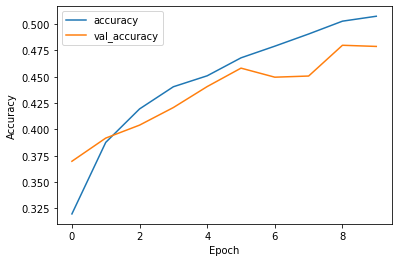

In [ ]:
# 학습 과정 시각화
plt.plot(history.history[" '''1''' "], label=" '''1''' ")
plt.plot(history.history[" '''2''' "], label=" '''2''' ")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# 모델 평가
test_loss, test_acc = '''3'''                #verbose=0
print("Test accuracy:", test_acc)

Test accuracy: 0.4864000082015991


1/1 [==============================] - 0s 23ms/step


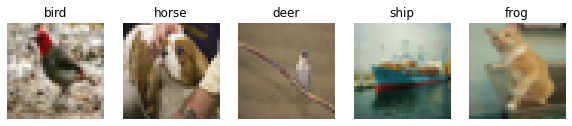

In [ ]:
# 임의의 이미지 예측 
# CIFAR-10 데이터셋이 이미지 데이터에서 노이즈가 많은편이라 모델의 정확도를 높이기 어려웠습니다 ㅠ
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

fig, axs = plt.subplots(1, 5, figsize=(10, 10))
for i in range(5):
    idx = np.random.randint(len(x_test))
    img = x_test[idx]
    pred = model.predict(np.expand_dims(img, axis=0))[0]
    label = class_names[np.argmax(pred)]
    axs[i].imshow(img)
    axs[i].set_title(label)
    axs[i].axis("off")
plt.show()